### Build and test a Nearest Neighbors classifier.

Load the relevant packages.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

Load the Iris data to use for experiments. The data include 50 observations of each of 3 types of irises (150 total). Each observation includes 4 measurements: sepal and petal width and height. The goal is to predict the iris type from these measurements.

<http://en.wikipedia.org/wiki/Iris_flower_data_set>

In [3]:
# Load the data, which is included in sklearn.
iris = load_iris()
print 'Iris target names:', iris.target_names
print 'Iris feature names:', iris.feature_names
X, Y = iris.data, iris.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)  #  To ensure repeatability of results
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:100], Y[:100]
test_data, test_labels = X[100:], Y[100:]

Iris target names: ['setosa' 'versicolor' 'virginica']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Create a distance function that returns the distance between 2 observations.

In [4]:
##  Note: the assumption is len (v1) == len (v2)
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        sum += (v1[index] - v2[index]) ** 2
    return sum ** 0.5

This is just an example of code for Euclidean distance.  In order to create a robust production-quality code, you have to be prepared for situations where len(v1) != len (v2): missing data; bad data; wrong data types, etc.  Make sure your functions are always prepared for such scenarios: as much as 50% of a data scientists' job is cleaning up the data.  A great overview of "what can go wrong with data" is, e.g., in this book:  http://www.amazon.com/Bad-Data-Handbook-Cleaning-Back/dp/1449321887.

Just for fun, let's compute all the pairwise distances in the training data and plot a histogram.

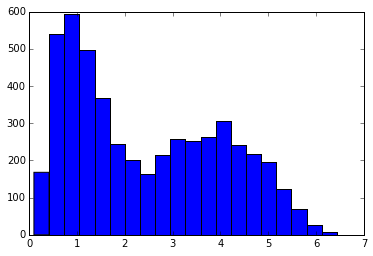

In [6]:
dists = []
for i in range(len(train_data) - 1):
    for j in range(i + 1, len(train_data)):
        dist = EuclideanDistance(train_data[i], train_data[j])
        dists.append(dist)
        
fig = plt.hist(dists, 20) ## Play with different values of the parameter; see how the view changes

Ok now let's create a class that implements a Nearest Neighbors classifier. We'll model it after the sklearn classifier implementations, with fit() and predict() methods.

<http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier>

In [13]:
class NearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance):
        self.metric = metric
    
    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test example and return results.
    def predict(self, test_data):
        results = []
        for item in test_data:
            results.append(self._predict_item(item))
        return results
    
    # Private function for making a single prediction.
    def _predict_item(self, item):
        best_dist, best_label = 1.0e10, None
        for i in range(len(self.train_data)):
            dist = self.metric(self.train_data[i], item)
           # print i, dist, best_dist, best_label, self.train_labels[i]
            if dist < best_dist:
                best_label = self.train_labels[i]
                best_dist = dist
        return best_label

Run an experiment with the classifier.

In [14]:
clf = NearestNeighbors(metric = EuclideanDistance)
clf.fit(train_data, train_labels)
preds = clf.predict(test_data)

correct, total = 0, 0
for pred, label in zip(preds, test_labels):
    if pred == label: correct += 1
    total += 1
    
accuracy = 1.0*correct/total
accuracy_pct = 100.0*correct/total

print 'total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, accuracy_pct)
print pred

total:  50  correct:  48  accuracy: 96.00
0


Let's try and see what happens if we do not set the seed for the random number generator.  When no seed is given, RNG usually sets the seed to the numeric interpretation of UTC (Coordinated Universal Time).  Let us do just that (change the second argument in range() function before you run this loop):

In [16]:
X, Y = iris.data, iris.target
import time
Now = time.time()
print long (Now.real * 100)

# Now run the same codeShuffle the data, but make sure that the features and accompanying labels stay in sync.
for i in range (0, 50):
    myseed = long(Now.real)+i
    np.random.seed(myseed)  #  To ensure repeatability of results

    shuffle = np.random.permutation(np.arange(X.shape[0]))
    X, Y = X[shuffle], Y[shuffle]

    # Split into train and test.
    train_data, train_labels = X[:100], Y[:100]
    test_data, test_labels = X[100:], Y[100:]

    clf.fit(train_data, train_labels)
    preds = clf.predict(test_data)

    correct, total = 0, 0
    for pred, label in zip(preds, test_labels):
        if pred == label: correct += 1
        total += 1
    print 'seed: %ld total: %3d  correct: %3d  accuracy: %3.2f' %(myseed, total, correct, 1.0*correct/total)



143226146398
seed: 1432261463 total:  50  correct:  49  accuracy: 0.98
seed: 1432261464 total:  50  correct:  49  accuracy: 0.98
seed: 1432261465 total:  50  correct:  49  accuracy: 0.98
seed: 1432261466 total:  50  correct:  48  accuracy: 0.96
seed: 1432261467 total:  50  correct:  48  accuracy: 0.96
seed: 1432261468 total:  50  correct:  46  accuracy: 0.92
seed: 1432261469 total:  50  correct:  47  accuracy: 0.94
seed: 1432261470 total:  50  correct:  47  accuracy: 0.94
seed: 1432261471 total:  50  correct:  48  accuracy: 0.96
seed: 1432261472 total:  50  correct:  49  accuracy: 0.98
seed: 1432261473 total:  50  correct:  47  accuracy: 0.94
seed: 1432261474 total:  50  correct:  48  accuracy: 0.96
seed: 1432261475 total:  50  correct:  49  accuracy: 0.98
seed: 1432261476 total:  50  correct:  47  accuracy: 0.94
seed: 1432261477 total:  50  correct:  48  accuracy: 0.96
seed: 1432261478 total:  50  correct:  47  accuracy: 0.94
seed: 1432261479 total:  50  correct:  47  accuracy: 0.94
s

The accuracy varies with the random seed.  It is normal and expected.  It is important to be aware of this phenomenon: shuffling does matter, and it does affect the classification accuracy.  

When you report findings with any ML methodology, or compare your results with someone else's, it is very important to keep it in mind and account for it.

As an optional homework, plot the histogram of accuracy after 100 iterations of the Nearest_Neighbors algorithm in this worksheet.